# **Monitoria em Sistemas de Controle para Engenharia**
### Coordenador: Cleison Silva
### Monitor - Bolsista: Felipe Piano (Turma 2017) 
---
# <center> Modelagem de sistema por função de transferência pulsada </center>
---

### **Objetivo:**

- Encontrar a função de transferência pulsada de uma planta real.

# Contextualização e introdução teórica

<p align='justify'>Este experimento tem como objetivo determinar um modelo matemático que descreva a dinâmica de um sistema LIT. Os sinais de entrada e de saída são utilizados.Um modelo de função de transferência pulsada/discreta é utilizado, pois os sinais são amostrados (tempo discreto).</p>





## A planta:
<p align='justify'>A planta utilizada consiste de uma bancada "motor-gerador". O nome é bem sugestivo, pois a planta é composta por um motor acoplado (mecanicamente) a um gerador (ambos DC) pelo eixo do rotor. O motor recebe um sinal de entrada (sinal de tensão) e o gerador fornece um sinal de saída (sinal de tensão). Uma placa Arduino é utilizada para coletar o sinal de saída através do conversor A/D e também gerar a tensão de entrada por um sinal PWM. Além do Arduino é utilizado um Driver Motor Ponte-H L298N. Uma imagem da planta é mostrada logo abaixo:</p>
<center><img src = https://drive.google.com/uc?id=1Acj5KFksC0gc9B3a2WLpaof1Qphg2Vpa width="500"></center>

Na planta também encontra-se um filtro passa-baixa RC série. Com essas informações podemos presumir que a planta seja de $3^{\underline{\circ}}$ ordem, pois o motor DC, o gerador DC e o filtro são subsistemas de $1^{\underline{\circ}}$ ordem em cascata. Isso não significa que o modelo adotados necessariamente precisa ser de $3^{\underline{\circ}}$ ordem, apenas é uma dica importante para interpretarmos os resultados.

## Resumo teórico sobre Identificação de Sistemas

Uma função de tranferência no domínio $z$ de ordem $N$ pode ser expressa da seguinte forma:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\sum\limits_{m=1}^{M}b_m z^{-m}}
{1 + \sum\limits_{n=1}^{N}a_nz^{-n}} \tag{1}$$

Em que $X(z)$ e $Y(z)$  representam a transformada $z$ dos sinais de entada e de saída, respectivamente.

Ao desenvolver os somatórios temos

$$ H(z) = \frac{ b_1z^{-1}+\dotsb+b_{M} z^{-M}}
{1+a_1z^{-1}+\dotsb+a_Nz^{-N}} \tag{2}$$

Ao aplicar a transformada $z$ inversa, obtem-se a equação de diferenças equivalente,

$$ y[k] = -a_1y[k-1] - \dotsb - a_N y[k-N]
+ b_1 x[k - 1] + \dotsb + b_M x[k-N] \tag{3}$$

Observe que se tem um sistema de equações dado por:

$$ \mathbf{y = \Psi \theta} \tag{4}$$

em que $\mathbf{\Psi}$ é a matriz de regressores e definida como segue,  

$$ \mathbf{\Psi} = \begin{bmatrix}
-y[k-1] & \dotsb & -y[k-N] & x[k-1] & \dotsb & x[k-M]
\end{bmatrix} \tag{5}$$

Ao expandir para uma quantidade $N_{a}$ de amostras, a equação (4) tem-se

$$ \begin{bmatrix} y[0]\\ y[1] \\ \vdots\\ y[N_a] \end{bmatrix} = \begin{bmatrix} -y[0-1] & \dotsb & -y[0-N] & x[0-1] & \dotsb & x[0-M]\\-y[1-1] & \dotsb & -y[1-N] &
 x[1-1] & \dotsb & x[1-M]\\ \vdots & \dotsb & \vdots &
\vdots & \vdots & \dotsb & \vdots\\-y[N_a-1] & \dotsb & -y[N_a-N] &
x[N_a-1] & \dotsb & x[N_a-M]   \end{bmatrix} \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix}$$

A matriz $\Psi$ é denomida de matriz de regressores por ser formada (no porcesso de construção) pelos termos do modelo (equação de diferenças) referentes aos sinais de entrada e de saída atrasados no tempo discreto. 

OBS: o coeficiente $b_0$ é zero, o que indica nenhuma conexão direta entre a entrada e a saída do sistema.

O vetor $\mathbf{\theta}$ é o vetor de coeficientes, definido como segue,

$$ \mathbf{\theta} = \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix} \tag{6}$$

e $\mathbf{y}$ é o vetor de saída no instante de tempo atual (k) . 

Para cada instante de tempo tem-se uma equação distinta, formando um sistema sobredeterminado, o que implica que não há solução exata. Para fins de práticos, uma aproximação é o suficiente. 

Observe que o problema de identificação é formulado de tal forma que os vetores de entrada e saída são conhecidos a partir dos sinais, dessa forma deve-se detrminar o vetor de coeficientes.

<p align='justify'>Para determinar o vetor de coeficientes utiliza-se o sistema de equações para formular um problema de mínimos quadrados, obtendo assim a seguinte expressão:</p>

$$ \mathbf{\theta}^{*} = \mathbf{\left(\Psi^T\Psi \right)^{-1}\Psi^Ty} \tag{7}$$

<p align='justify'>Após determinar o vetor de coeficientes pode-se substituir os valores obtidos na função de transferência proposta inicialmente e definir o modelo.</p>



## Validação do modelo

<p align='justify'>Tipicamente em Identificação de Sistemas, sempre que levantado um modelo deve-se valida-lo, pois é crucial analisar se o mesmo de fato descreve de maneira aproximada a dinâmica do sistema.</p>

<p align='justify'>Existem diversos métodos para validar um modelo, aqui iremos optar por utilizar uma métrica chamada Erro Quadrático Médio (EQM). Esse método consiste em calcular a média das diferenças ao quadrado entre o sinal observado e o sinal predito, que resulta na seguite expressão:</p>

$$ EQM = \frac{1}{N_a - 1}\sum\limits_{i=0}^{N_a - 1}( y_i - \hat{y}_i)^2 \tag{8}$$

onde $N_a$ é número de amostra dos dados, $y_i$ é a $i$-ésima amostra do sinal observado e $\hat{y}_i$ é a $i$-ésima amostra do sinal predito pelo modelo. No geral quanto menor for o valor do EQM, mais a resposta do modelo se aproxima ao sistema real.

## Passos de execução

Considere a seguinte sequência de passos para resolver o problema de modelagem:

1. Obter os dados de entrada e de saída do sistema;
2. Dividir os dados obtidos em dados para treino e validação;
3. Definir a função de transferência de representará o sistema;
4. Criar a matriz de regressores;
5. Encontrar o vetor de coeficientes pela formulação de mínimos quadrados;
6. Substituir os coeficientes e encontrar a função de tranferência pulsada da planta.
7. Validar o modelo encontrado.

<p align='justify'>Vale destacar para o passo 1, que a entrada aplicada na planta no contexto de Identificação de Sistemas geralmente é um sinal chamado Pseudo Random Binary Sequence (PRBS). Esse sinal tem o propósito de extrair da planta o máximo de informação sobre a dinâmica de transitórios. </p>

# Configuração inicial

Primeiro, instale a biblioteca `control`.

Disponível no site https://python-control.readthedocs.io/en/0.9.3.post2/

In [ ]:
#!pip install control

# Detalhes

Importe as bibliotecas de apoio para gerar os gráficos e manipular os números.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from sklearn.metrics import mean_squared_error

## Passo 1

<p align='justify'>Conforme descrito nos passos de execução, primeiro deve-se obter os dados de entrada e de saída da planta. Como se trata de simulação não é possível realizar essa etapa na prática (aquisição dos sinais), no entando é possível utilizar os dados coletados anteriormente e armazenados em um arquivo (.CSV), e disponibilizado <a href="https://drive.google.com/file/d/1UpBcukprgFFa-SJzn3SE5kuwzIXhTffO/view?usp=sharing">esse link</a> para download de um arquivo .csv contendo os dados de entrada, saída e o vetor de tempo do ensaio realizado na bancada. O arquivo é organizado por linha, a primeira linha contém o vetor de tempo, a segunda contém o dados de entrada e a terceira os dados de saída, cada linha é composta por 1000 amostras.</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Link de compartilhamento do arquivo
# url = 'https://drive.google.com/file/d/1UpBcukprgFFa-SJzn3SE5kuwzIXhTffO/view?usp=sharing'
url = '/content/drive/MyDrive/Monitoria-2020-ERE-Sistemas_de_Controle_I/2021 - Lab Controle/Felipe/Programa Python/Ensaio_01/ensaio_01.csv'

# Separa o id para download
# file_id = url.split('/')[-2] 

# Organiza o link de download
# dwn_url = 'https://drive.google.com/uc?id=' + file_id

# Faz download do arquivo e armazena na memória da maquina virtual
dados = pd.read_csv(url,header=None).values

# Separa o vetor de tempo do experimento
tempo = dados[0,:] 

# Separa os dados de entrada do experimento
entrada = dados[1,:] 

# Separa os dados de saída do experimento
saida = dados[2,:] 

<p align='justify'>Uma boa prática em um primeiro contato com dados desconhecidos é visualizá-los em forma de gráficos, portanto, vamos plotar um gráfico com a entrada e saída da planta para se familiarizar com o sistema.</p>

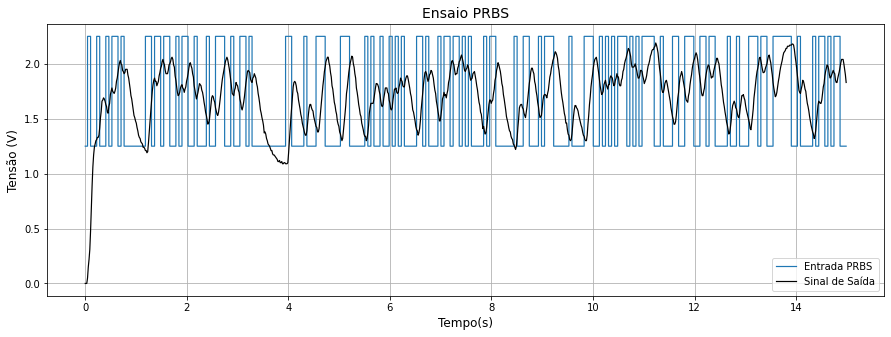

In [ ]:
# Configura o tamanho da figura
plt.figure(figsize=(15,5)) 

# Plota o gráfico de entrada
plt.plot(tempo,entrada, drawstyle="steps", linewidth=1.2) 

# Plota o gráfico de saída
plt.plot(tempo,saida, color='k',linewidth=1.2) 

# Configura o rótulo do eixo x
plt.xlabel('Tempo(s)', fontsize=12) 

# Configura o rótulo do eixo y
plt.ylabel('Tensão (V)', fontsize=12) 

# Configura o título
plt.title('Ensaio PRBS', fontsize=14) 

# Configura a legenda
plt.legend(loc='lower right', labels=('Entrada PRBS','Sinal de Saída')) 

# Configura a grade do gráfico
plt.grid(True) 

# Mostra o gráfico gerado
plt.show() 

# Exercício 01

Responda:

1. Qual é a excursão em amplitude dos sinais de entrada (sinal PRBS) e de saída?
2. Qual é o valor médio dos sinais de entrada e de saída ?
3. Por quê os sinais de entrada e de saída são diferentes ? Quais são as semalhanças ?
4. Como você descreveria o comportamento do sistema com base na resposta para entrada PRBS ?  

# Passo 2

Os dados são dividimos em dois subconjuntos: o de treino e de teste conforme o código abaixo.

In [ ]:
# Vetores de tempo
intervalo_train = np.arange(50,500)
intervalo_test = np.arange(500,1000-50)

t_train, t_test = dados[0,intervalo_train], dados[0,intervalo_test]

# Vetores da entrada
xtrain, xtest = dados[1,intervalo_train], dados[1,intervalo_test]

# Vetores da saída
ytrain, ytest = dados[2,intervalo_train], dados[2,intervalo_test]

# Passo 3

Nesse passo deve-se determinar a ordem da função de transferência pulsada. Uma seleção arbitrária seria a primeira ordem, substituindo o valor de $N = 1$ na Eq. 1 obtem-se:

$$ H(z) = \frac{b_0+b_1z^{-1}}
{1+a_1z^{-1}} \tag{9}$$

Observe que $M=1$ é adotado.

Novamente, desatca-se que considera-se $b_0 = 0$, isso fará com que a função de transferência não tenha zeros finitos. Logo, temos:

$$ H(z) = \frac{b_1z^{-1}}
{1+a_1z^{-1}} \tag{10}$$

expressando na forma de equação de diferenças:

$$ y[n] = -a_1y[n-1] + b_1x[n-1] \tag{11}$$

Dessa forma, já podemos desenvolver o código para calcular os coeficientes.

# Exercício 2

1. Determine a função de transferência para o caso de se obter um sistema de segunda ordem.
2. Com base na função de transferência do item 1, determine a equação de diferenças do sistema.

# Passo 4

A matriz de regressores pode ser montada através do código abaixo.

In [ ]:
# Variável tempo discreto (amostras)
k = np.arange(1, len(xtrain))

# Matriz de Regressores (Primeira Ordem)
PSI = np.array([-ytrain[k-1], xtrain[k-1]]).T

# Passo 5

Podemos expressar a Equação 7 em forma de código e calcular o vetor de coeficientes conforme segue.

In [ ]:
# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Passo 6

Sistema de Primeira Ordem

Substituindo os coeficientes na Eq. 10 obtemos a funções de transferência pulsado do sistema conforme o código abaixo.

In [ ]:
# Separando os coeficientes
a1, b1 = teta
# a1, a2, b1, b2 = teta

# Numerador de H(z)
B = [b1]
# B = [b1, b2]

# Denominador de H(z)
A = [1, a1]
# A = [1, a1, a2]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo))
print('Período de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z)=", Gz)

Período de Amostragem: 0.015000000000000189

 G(z)= 
 0.03648
----------
z - 0.9651

dt = 0.015000000000000189



# Passo 7

<p align='justify'> Por ultimo, mas não menos importante, deve-se validar a função de transferência encontrada com os dados de teste. Para isso iremos utilizar a Eq. 8 para calcular o erro quadrático médio. A biblioteca scikit-learn já possui uma função para realizar esse cálculo conforme o código abaixo. Como observado o valor do erro foi relativamente baixo, o que nos mostra que o modelo está razoável.</p>

In [ ]:
# Respostas da função de transferência para a entrada de validação.
y_hat = ct.forced_response(Gz, U=xtest)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(ytest[50:], y_hat[50:])
print('Erro médio quadrático: %.6f' % MSE)

Erro médio quadrático: 0.019710


<p align='justify'>Outra forma de visualizar se o modelo está satisfatório é comparando o gráfico dos valores preditos com os observados. Como é visto no gráfico abaixo, o modelo é satisfatório em alguns momentos, mas em outros fica distante o valor observado, uma forma de tentar melhorar o modelo seria aumentando a ordem a função de transfência.</p>

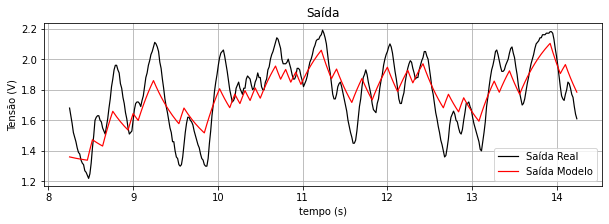

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(t_test[50:], ytest[50:], '-k', linewidth=1.2)
plt.plot(t_test[50:], y_hat[50:], '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right', labels=('Saída Real', 'Saída Modelo'))
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()

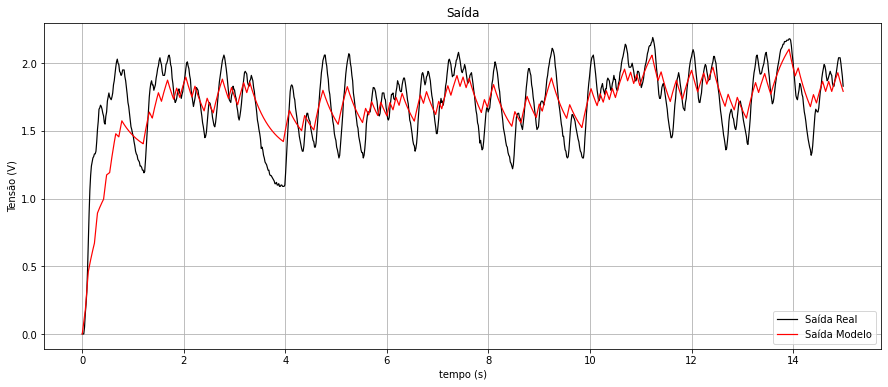

In [ ]:
y_saida = ct.forced_response(Gz, U=entrada)[1]

plt.figure(figsize=(15,6))
plt.plot(tempo, saida, '-k', linewidth=1.2)
plt.plot(tempo, y_saida, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right', labels=('Saída Real', 'Saída Modelo'))
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()


# Exercício 3

Refaça os passos para os seguintes casos:

1. N = 2 e M = 2, sistema segunda ordem;
2. N = 2 e M = 1, sistema segunda ordem;
3. N = 3 e M = 3, sistema terceira ordem;
4. N = 3 e M = 2, sistema terceira ordem;

Discuta os resultados com base no desenpenho da representação e na localização dos zeros do modelo.

Período de Amostragem: 0.015000000000000189

 G(z)= 
-0.001579 z + 0.03772
----------------------
z^2 - 1.576 z + 0.6104

dt = 0.015000000000000189

Erro médio quadrático: 0.001932


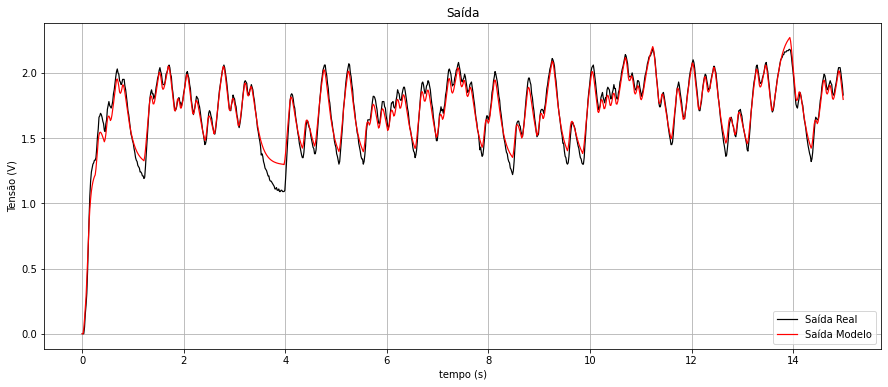

In [ ]:

# Matriz de Regressores (Segunda Ordem)
PSI = np.array([-ytrain[k-1], -ytrain[k-2], xtrain[k-1], xtrain[k-2]]).T

# Passo 
# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Passo
# Separando os coeficientes
a1, a2, b1, b2 = teta

# Numerador de H(z)
B = [b1, b2]

# Denominador de H(z)
A = [1, a1, a2]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo))
print('Período de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z)=", Gz)

# Passo
# Respostas da função de transferência para a entrada de validação.
y_hat = ct.forced_response(Gz, U=xtest)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(ytest[50:], y_hat[50:])
print('Erro médio quadrático: %.6f' % MSE)

y_saida = ct.forced_response(Gz, U=entrada)[1]

plt.figure(figsize=(15,6))
plt.plot(tempo, saida, '-k', linewidth=1.2)
plt.plot(tempo, y_saida, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right', labels=('Saída Real', 'Saída Modelo'))
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()

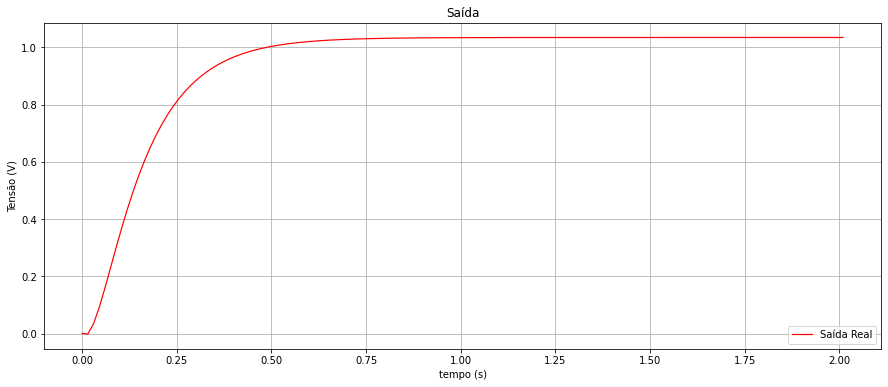

In [ ]:
t,y_step = ct.step_response(Gz, T = 2)

plt.figure(figsize=(15,6))
plt.plot(t, y_step, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right', labels=('Saída Real', 'Saída Modelo'))
plt.grid()
plt.subplots_adjust(hspace=0.5)
plt.show()

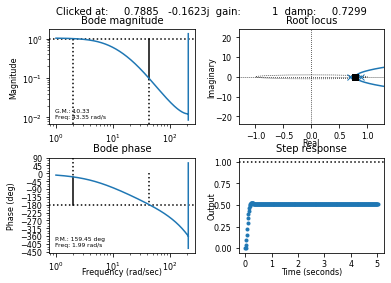

In [ ]:
plt.figure(figsize=(10,6))
ct.sisotool(Gz);
plt.show()